En este notebook se hace una aproximación de los sistemas Lindenmayer para modelar la diferenciación de las células iniciales cambiales fusiformes.
Antes de comenzar es importante introducir nociones báscias acerca de los sistemas Lindemayer así como las condiciones para simular el proceso de desarrollo cambial.
Definir un sistema que crezca en una sola dirección para simular una célula cambial que da origen a una célula inicial fusiforme y a otra cambial.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import turtle
import math
import turtle

In [2]:
def applyRules(lhch):
    """Apply stochastic rules using random distribution
    for values between 0 and 2 to apply rul1 or rule2 or
    rule3 """
    rhstr = ""
    s = np.random.randint(0,3,1)
    if lhch == 'A' and s == 0:
        rhstr = 'AF'   # Rule 1
    elif lhch == 'A' and s == 1:
        rhstr = 'AV' #Rule 2
    elif lhch == 'A' and s == 2:
        rhstr = 'AP'
    elif lhch == 'A':
        rhstr = 'B'  # Rule 2
    else:
        rhstr = lhch    # no rules apply so keep the character

    return rhstr

In [3]:
def processString(oldStr):
    newstr = ""
    for ch in oldStr:
        newstr = newstr + applyRules(ch)
    return newstr

In [4]:
def createLSystem(numIters,axiom):
    startString = axiom
    endString = ""
    for i in range(numIters):
        endString = processString(startString)
        startString = endString
    return endString

In [5]:
lengths_array = np.random.randint(10,150,100)
random_files = []
for i in lengths_array:
    random_files.append(createLSystem(i,'A'))

In [6]:
random_files

['AFPVPFFVFFPVFFVVFPPVFPPPVFVFPPPPPVVFVPPFFFVVFPFFPPVPPFPVPFVPFPPPPFPVFVPFPFPFPPVFFPFPVPPPVVPFPPPFVPPFVPFVVVPFFVFPPVPVFVPVFVFP',
 'AVVFPFFVVFFFFFVFFFPPVVVPPPPVFVVFFVPVPVPFFPPVPPFVPFVFPPFFFFFPPVVPPPFPPPFVFVPPFFVFVPFPPVVFFFPVVFVPVF',
 'APPPVPFFFVPPVPPPPFP',
 'AFVPVFVVPVVVVVFFFPVP',
 'AVFFPFPPPFVPPFPFFPVVVPVPFVFPPPFVPPPPFFFPFVFFVFFVFPPFVVFVVPVVFVVVVPVVVVFPPPFPPPFVVPFVFFVFFVPFFVFVFPPVVVPP',
 'APPVFFPFFFFPPPFVFVFVVVVVFFPVVFPVVFFVPVPPFFPPFFPVVFVPVVPFVPFVVVPFFFFPFVFVPVFPFV',
 'AFVVPPVVFFPVPFPFVVVFVPFPVFVPVVPFFVVPVVPPVFFPPVFPPPVVVFFPPPFFFFVFFPFVFFPPFPFFVFFVPPPPPVPFPFPVPFFFFFFPPFVPFF',
 'AFFVPFFVVFVVFFFF',
 'APPFVFVFFFFVPFVPPFVVVFFFVVPPPVFFFVPPVFVVFPPPFPFPVPPPPFVFPFF',
 'AFFVVFFVVPFFVFFVPFFVVFVPVPPPVPFFPVVVFVFFVVFFFFPFVFPPPVPFPPPPVFPVPVPFVVVPVPPFVPPFF',
 'APFFVVVVFFPPVPVVFFFVFVVPVVVFFVPFFFFVPPVPVPVPFPPPPPVFVVVPVVVVVPPVVPVVFPFPFVPFVPVFVFFPV',
 'APFVFVFFPVFFFPVPVFVPPVPPVVPVVPFFPPPVPPVVP',
 'AFVFPVFVFPVVFPVFPPVFVFFFFPPPPVFFPVFPFPFFFFVPFFFFPVVPFF',
 'APVFFFPVFVPFPPFPFFFFPFVFFVFVVFFFVVPFPVFPPPFPVPVF

In [7]:
#np.random.randint(10,150,100)
a = 'ABVVFVF'
#print(np.array([list(a) for word in a ]))
print(np.array(list(a)))


['A' 'B' 'V' 'V' 'F' 'V' 'F']


### Make  L-system with ray cells included.

In [62]:
import random
random.randrange(0,2)
rulesR = { "A" : ["AB","Z"] , "B" : ["V","F","P"], "Z": "ZR"}
##
def iteratex(axioms, rules):
    new_text = []
    parsero = list(axioms)
    parsero.append('')
    for i, item in enumerate(parsero):
        if item == '':
            pass
        #If string is just AB it will generate V,F or P with equal probability
        elif item in rules and parsero[i]=='A':
            s = random.uniform(0, 1)
            if s < 0.998:
                new_text.append(rules[item][0])
            else:
                new_text.append(rules[item][1])
        #   
        elif item in rules and parsero[i+1]=='':
            if parsero[i] == 'R':
                new_text.append(rules[item])
            elif parsero[i] == 'B':
                s = random.randint(0,3)
                if s == 0:
                    new_text.append(rules[item][0])
                elif s == 1:
                    new_text.append(rules[item][1])
                else:
                    new_text.append(rules[item][2])
            elif parsero[i] == 'Z':
                new_text.append(rules[item])
        elif item in rules and parsero[i]=='B':
            s = random.randint(0,3)
            if s == 0:
                new_text.append(rules[item][0])
            elif s == 1:
                new_text.append(rules[item][1])
            else:
                new_text.append(rules[item][2])
        elif item in rules and parsero[i]=='R':
            new_text.append(rules[item])
            
        elif item in rules:
            new_text.append(rules[item])
        
        else:
            new_text.append(item)
    return ''.join(new_text)

###
def lsystemr(axioms, rules, iteration):
    x = axioms
    for i in range(iteration):
        x=iteratex(x, rules)
    return ''.join(x)
lsystemr('A',rulesR, 5)


'ABFFPF'

In [59]:
lsystemr('A',rulesR, 100)

'ZRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRPPFPFFPPFPVVVPVPFVVVPPPVFVFPPPPFFP'

In [63]:
#23% mean of files are ray cells
lengths_array = np.random.randint(10,150,120)
random_files = []
for i in lengths_array:
    s = random.uniform(0, 1)
    if s < 0.77:
        random_files.append(lsystemr('A',rulesR,i))
    else:
        random_files.append(lsystemr('Z',rulesR,i))

In [64]:
random_files

['ABVPFVPFPVPPPPPFVPVVVPVPPPVVPPPPPVFFPPPFVPVVVFFPVPPFPPVFPVPPPVFPVFVPVVVPPPPVFFFPPVVPPPVPPVPPPFVFVPP',
 'ABVFFPPPFVPPFVVPVFVPPPVFFVVVVPFPPPPPFPPPPVPPPFFPVPFPPFVFPFFFVPPVVFFPPVFFVVFVFVFPVVPVPPPFPPFPVVFFPPFVFFVPPPPPVPVVVPFPVPFPPPPVPPPFPVPPFPP',
 'ABPPPPVPPFPFVFFFPPFFVVPVVPVVPFPFVVPFPPFPPPPPPVFPFPPVPVFPFFFFFPPPPVFPVPFPFPFPVVPVPPPVPVVVPFVVFVPVPPP',
 'ABVFFFFFPPPPVFFFV',
 'ABPVPPPPPPVPFPPVPVPVPPVVVPVPPPPVPPPVVFPPPPVFPPFPFPFFPFVPPPPPPPPPPVFPVPPVFPFPPPPVVFPFPPPPPPPVVFPFPFVPVVPFPFPPPPVPFPVPPVPPFVFFPPVFFVVPPPF',
 'ZRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR',
 'ABVFFFPVFFVPPVPPPFPFVPFVPPPPVVFVFFPVFFFFPPPPPFFPFFPVPPFPVPPPPPPVPFVVFPPPPFPVPVPFPVPPVVVVPFVPPFPPFPVPFVPVPVVFVFPPPVVPVPFPPVPVPPVPPPPPVPVVPVFFVVFF',
 'ABPVVFPPFPPPFFPFPPVFPPPVFPPPVVFPPPPVFPPFPFPPFPVFVPPPVVPFVFFPVVPVPVPFFPPPVPVVPPPPPPPFFPVFFPPFFPPPPVPFFPVPPFPVPPFPFVPPPFFVPFVPPPPPPPPPFPVFPVPFFVPPPPPFF',
 'ABPPVPPPFPPPPFVVFVFVVFVPVVPPPFPPPFPPPPPPPVPPFVFPPVPPVPPPVVFPPVPPPPPFFPVVFVVFFFVFPPVPPPFVFP

In [37]:
rules_ctsens = { "A" : "AB" , "B" : ["V","F","P"]}
def iteratex(axioms, rules):
    new_text = []
    parsero = list(axioms)
    parsero.append('')
    for i, item in enumerate(parsero):
        if item == '':
            pass
        #If string is just AB it will generate V,F or P with equal probability
        elif item in rules and parsero[i+1]=='':
            s = np.random.randint(0,3,1)
            if s == 0:
                new_text.append(rules[item][0])
            elif s == 1:
                new_text.append(rules[item][1])
            else:
                new_text.append(rules[item][2])
        #Contexte sensitivity. If V is the last derivative produced 
        # probabilities are different
        elif item in rules and parsero[i+1]=='V':  # 0.2784	0.3658	0.3558
            s = np.random.uniform(low=0, high=1, size=None)
            if s < 0.2784:
                new_text.append(rules[item][0])
            elif 0.2784 <= s < 0.6442:
                new_text.append(rules[item][2])  
            else:    
                new_text.append(rules[item][1])     
        #Contexte sensitivity. If F is the last derivative produced 
        # probabilities are different
        elif item in rules and parsero[i+1]== 'F':
            s = np.random.uniform(low=0, high=1, size=None)
            if s < 0.9288:   #0.9288	0.0017	0.0695
                new_text.append(rules[item][1])
            elif 0.9288 <= s < 0.9305:
                new_text.append(rules[item][0])  
            else:    
                new_text.append(rules[item][2])
        #Contexte sensitivity. If P is the last derivative produced 
        # probabilities are different        
        elif item in rules and parsero[i+1]== 'P': #0.2247	0.1427	0.6326
            s = np.random.uniform(low=0, high=1, size=None)
            if s < 0.2247 :
                new_text.append(rules[item][2])
            elif 0.2247 <= s < 0.3674 :
                new_text.append(rules[item][0])  
            else:    
                new_text.append(rules[item][1])  
                
        elif item in rules:
            new_text.append(rules[item])
        
        else:
            new_text.append(item)
    return ''.join(new_text)

def clsystemx(axioms, rules, iteration):
    x = axioms
    for i in range(iteration):
        x=iteratex(x, rules)
    return ''.join(x)


In [40]:
clsystemx('AB', rules_ctsens, 4)

'ABFFFF'

Alfabeto:
C i = cambial inicial
C d = cambial diferenciable
V = vaso
F = fibra
P = parénquima
Sistema-L estocástico
p
W : C i
p1: C i →C i C d
p2: C i < C d 0.33 → C i F
p3: C i < C d 0.33 → C i P
p4: C i < C d → C i Vp
p5: C i < C d > F→ F p11: C i < C d > V→ F
p6: C i < C d > F→ P p12: C i < C d > V→ V
p7: C i < C d > F→ V P13: C i < C d > V→
p8: C i < C d > P→ F
p9: C i < C d > P→ Pp
p10: C i < C d > P→V

# Word counting
Using the random_files array to count frequencies and stablish the vocabulary with a defined k-mer length.


In [35]:
import wordanalysis

In [54]:
print(wordanalysis.get_words(random_files[1],2))
print(wordanalysis.get_words(random_files[2],2))

{'ZR': 1, 'RR': 13, 'RV': 1, 'VP': 1, 'PF': 1, 'FP': 1, 'PP': 1, 'PV': 1, 'VF': 1, 'FF': 1, 'FV': 1}
{'AB': 1, 'BP': 1, 'PV': 12, 'VP': 9, 'VF': 3, 'FP': 6, 'PP': 8, 'PF': 4, 'FF': 3, 'VV': 1, 'FV': 1}


In [37]:
x = wordanalysis.get_all_words(random_files,5)

Las funciones ya funcionan. Ahora se tiene cargar un de pedilanthus y convertirlo en una lista de strings.

In [6]:
import os
import re
path = '../Data/Cell_files_data/'
files = os.listdir(path)
filenames = {}
for i in files:
    m = re.search(r'.*[^_edited_cells.txt]',i)
    filenames[m.group()] = [i]
filenames

{'974': ['974_edited_cells.txt'],
 '892': ['892_edited_cells.txt'],
 'EPM10': ['EPM10_edited_cells.txt'],
 'EPM11': ['EPM11_edited_cells.txt'],
 'EPM6_S2-1': ['EPM6_S2-1_edited_cells.txt'],
 '883': ['883_edited_cells.txt'],
 'contextxericLsystem': ['contextxericLsystem_edited_cells.txt'],
 '981': ['981_edited_cells.txt'],
 '896': ['896_edited_cells.txt'],
 '971a': ['971a_edited_cells.txt'],
 '973': ['973_edited_cells.txt'],
 '867': ['867_edited_cells.txt'],
 'EPM5': ['EPM5_edited_cells.txt'],
 'probLsystem': ['probLsystem_edited_cells.txt'],
 'EPM7': ['EPM7_edited_cells.txt'],
 '979': ['979_edited_cells.txt'],
 'EPM9': ['EPM9_edited_cells.txt'],
 'Ray_Lsystem': ['Ray_Lsystem_edited_cells.txt'],
 '917': ['917_edited_cells.txt'],
 'EPM12': ['EPM12_edited_cells.txt'],
 '845': ['845_edited_cells.txt'],
 'contextmesicLsystem': ['contextmesicLsystem_edited_cells.txt'],
 '853': ['853_edited_cells.txt']}

In [7]:
my_vocabulary = set()
for keys, values in filenames.items():
    with open(path+values[0]) as f:
        x = f.readlines()
        filenames.setdefault(keys,[]).append(x)
    values[1] = [x.strip() for x in values[1]]  
    values[1] = [x.upper() for x in values[1]]  
    for s in values[1]:
        for z in s:
            my_vocabulary.add(z)
            

In [46]:
#Count number of cells that  start as ray cell files
ray_proportions = []
for values in filenames.values(): 
    x = 0
    for z in values[1]:
        if z[-1] == 'R':
            x += 1
    ray_proportions.append([values[0],x])        

974_edited_cells.txt 26
892_edited_cells.txt 17
EPM10_edited_cells.txt 25
EPM11_edited_cells.txt 24
EPM6_S2-1_edited_cells.txt 23
883_edited_cells.txt 58
contextxericLsystem_edited_cells.txt 0
981_edited_cells.txt 32
896_edited_cells.txt 16
971a_edited_cells.txt 22
973_edited_cells.txt 21
867_edited_cells.txt 21
EPM5_edited_cells.txt 22
probLsystem_edited_cells.txt 0
EPM7_edited_cells.txt 25
979_edited_cells.txt 20
EPM9_edited_cells.txt 50
917_edited_cells.txt 29
EPM12_edited_cells.txt 19
845_edited_cells.txt 19
contextmesicLsystem_edited_cells.txt 0
853_edited_cells.txt 37


In [49]:
y = 0
for i in ray_proportions:
    y += i[1]
meanraycells = y/len(ray_proportions)    
print(meanraycells)

23.0


In [55]:
for values in filenames.values(): 
    print(values[0], wordanalysis.get_all_words(values[1], 2))

974_edited_cells.txt {'PV': 177, 'VV': 134, 'VF': 76, 'FF': 11675, 'FP': 2961, 'PF': 2922, 'VP': 134, 'RR': 6514, 'RP': 9, 'PP': 236, 'RF': 52, 'FV': 36, 'FR': 2, 'PR': 1}
892_edited_cells.txt {'FF': 7202, 'FP': 1536, 'PF': 1517, 'PP': 222, 'PV': 63, 'VV': 101, 'VF': 22, 'RR': 2724, 'VP': 43, 'RF': 6, 'RP': 2, 'RV': 1, 'PR': 1, 'FR': 1, 'FV': 2}
EPM10_edited_cells.txt {'PP': 120, 'PF': 305, 'FF': 6696, 'FP': 374, 'PV': 90, 'VP': 21, 'RR': 1953, 'VF': 69, 'RF': 21, 'RV': 1, 'FR': 7, 'FV': 5, 'VV': 26, 'RP': 4, 'VR': 1}
EPM11_edited_cells.txt {'FF': 10074, 'FP': 386, 'PP': 129, 'PV': 93, 'VF': 69, 'VP': 26, 'PF': 315, 'RR': 2613, 'RF': 13, 'FV': 5, 'RP': 4, 'FR': 1, 'PR': 1, 'VV': 17, 'RV': 2, 'VR': 1}
EPM6_S2-1_edited_cells.txt {'FF': 4689, 'FP': 264, 'PF': 254, 'RR': 1240, 'RF': 16, 'PP': 105, 'PV': 66, 'VP': 46, 'FV': 14, 'VV': 17, 'VF': 33, 'PR': 1, 'RP': 4}
883_edited_cells.txt {'FF': 12044, 'FP': 3329, 'PF': 3320, 'RR': 6103, 'PP': 336, 'RF': 20, 'PV': 171, 'VV': 151, 'VP': 158, 'V

In [10]:
for values in filenames.values(): 
    print(values[0], wordanalysis.get_all_words(values[1], 1))

974_edited_cells.txt {'P': 3359, 'V': 348, 'F': 14812, 'R': 6601}
892_edited_cells.txt {'F': 8797, 'P': 1817, 'V': 168, 'R': 2750}
EPM10_edited_cells.txt {'P': 529, 'F': 7166, 'V': 125, 'R': 2004}
EPM11_edited_cells.txt {'F': 10540, 'P': 556, 'V': 120, 'R': 2656}
EPM6_S2-1_edited_cells.txt {'F': 5079, 'P': 436, 'R': 1283, 'V': 100}
883_edited_cells.txt {'F': 15533, 'P': 3844, 'R': 6186, 'V': 340}
contextxericLsystem_edited_cells.txt {'F': 8562, 'P': 999, 'V': 307}
981_edited_cells.txt {'R': 4378, 'F': 17043, 'P': 1980, 'V': 254}
896_edited_cells.txt {'F': 9252, 'P': 1736, 'R': 3196, 'V': 136}
971a_edited_cells.txt {'F': 19053, 'P': 4107, 'V': 356, 'R': 5768}
973_edited_cells.txt {'P': 1618, 'F': 13817, 'V': 304, 'R': 3447}
867_edited_cells.txt {'F': 13830, 'P': 2712, 'V': 239, 'R': 4747}
EPM5_edited_cells.txt {'F': 6036, 'P': 368, 'R': 1639, 'V': 137}
probLsystem_edited_cells.txt {'V': 3078, 'P': 2993, 'F': 3008}
EPM7_edited_cells.txt {'F': 8455, 'R': 2892, 'P': 909, 'V': 218}
979_edit

In [11]:
for values in filenames.values(): 
    print(values[0], wordanalysis.get_all_words(values[1], 5))

974_edited_cells.txt {'PVVVV': 8, 'VVVVV': 6, 'VVVVF': 4, 'VVVFF': 9, 'VVFFF': 16, 'VFFFP': 12, 'FFFPF': 1575, 'FFPFF': 1534, 'FPFFF': 1639, 'PFFFF': 1266, 'FFFFP': 1238, 'FFFPV': 82, 'FFPVP': 33, 'FPVPF': 18, 'PVPFF': 25, 'VPFFF': 43, 'PFFFP': 478, 'FFFFF': 6097, 'RRRRR': 6259, 'RRRRP': 9, 'RRRPF': 4, 'RRPFF': 2, 'RPFFF': 1, 'FFPFP': 441, 'FPFPF': 606, 'PFPFP': 191, 'FPFPP': 23, 'PFPPF': 24, 'FPPFF': 76, 'PPFFF': 76, 'PFPFF': 458, 'FPFFP': 363, 'PFFPF': 369, 'FFPVF': 21, 'FPVFF': 24, 'PVFFP': 8, 'VFFPF': 14, 'FFFPP': 82, 'FFPPF': 79, 'PPFFP': 33, 'PVFFF': 22, 'FFPVV': 44, 'FPVVF': 11, 'PVVFP': 4, 'VVFPV': 2, 'VFPVF': 1, 'FPPFP': 23, 'PPFPF': 29, 'PFFPP': 26, 'RRRRF': 51, 'RRRFF': 33, 'RRFFP': 12, 'RFFPF': 7, 'FPVVP': 24, 'PVVPF': 18, 'VVPFP': 7, 'VPFPV': 4, 'PFPVV': 8, 'PVVFF': 8, 'VFFFF': 29, 'PVPFP': 9, 'VPFPF': 14, 'FPVVV': 18, 'PVVVP': 11, 'VVVPF': 14, 'VVPFF': 27, 'RRFFF': 19, 'RFFFP': 7, 'VVFFP': 6, 'FFPPV': 9, 'FPPVP': 8, 'PPVPF': 4, 'PPVPP': 4, 'PVPPF': 5, 'VPPFF': 8, 'FPFPV':

In [12]:
#El código funciona. Ahora falta quitar los radios y sin que se afecte el orden de las otras células
for values in filenames.values(): 
    values.append([])
    for i in range(0,len(values[1])):
        x = values[1][i].replace('R','')
        if x == '':
            pass
        else:
            values[2].append(x)

In [35]:
#Create a dictionary to save the word counting 
word_diversity = {}
for values in filenames.values(): 
    word_diversity[values[0]] = wordanalysis.get_all_words(values[2], 4)

In [36]:
word_diversity

{'974_edited_cells.txt': {'PVVV': 25,
  'VVVV': 16,
  'VVVF': 12,
  'VVFF': 23,
  'VFFF': 42,
  'FFFP': 1747,
  'FFPF': 1986,
  'FPFF': 2018,
  'PFFF': 1766,
  'FFFF': 7442,
  'FFPV': 99,
  'FPVP': 42,
  'PVPF': 34,
  'VPFF': 54,
  'FPFP': 648,
  'PFPF': 652,
  'PFPP': 31,
  'FPPF': 104,
  'PPFF': 112,
  'PFFP': 408,
  'FPVF': 25,
  'PVFF': 30,
  'VFFP': 18,
  'FFPP': 113,
  'FPVV': 53,
  'PVVF': 12,
  'VVFP': 9,
  'VFPV': 2,
  'PPFP': 36,
  'PVVP': 30,
  'VVPF': 34,
  'VPFP': 18,
  'PFPV': 21,
  'VVVP': 19,
  'FPPV': 11,
  'PPVP': 11,
  'PVPP': 16,
  'VPPF': 12,
  'FPPP': 24,
  'PPPF': 33,
  'PFFV': 5,
  'FFVP': 6,
  'FVPF': 4,
  'FFFV': 23,
  'FFVV': 14,
  'FVVF': 8,
  'FFVF': 9,
  'FVFF': 8,
  'VVPV': 11,
  'VPVF': 7,
  'PPVV': 4,
  'PVPV': 18,
  'VPVP': 16,
  'VFPF': 11,
  'FVVV': 6,
  'VFFV': 1,
  'PPPP': 18,
  'VPPV': 4,
  'PPVF': 3,
  'PVFP': 5,
  'VPVV': 8,
  'VVPP': 9,
  'FVVP': 5,
  'VPPP': 10,
  'FVFP': 1,
  'FPFV': 5,
  'PFVP': 2,
  'FVPP': 1,
  'PPPV': 3,
  'PFVV': 5,
  'V

In [22]:
print(len(word_diversity['974_edited_cells.txt']))
print(len(word_diversity.keys()))
word_diversity.keys()

KeyError: '974_edited_cells.txt'

In [21]:
word_diversity

{}

In [79]:
#Calculate every pair of differences
import itertools
#try to write to a file
output_euc_list=[]
header = ["File1","File2", "Euc_dist"]
for k1, k2 in itertools.combinations(word_diversity, 2):
    output_euc_list.append([k1,k2,euc_dist(word_diversity[k1], word_diversity[k2])])

In [80]:
import csv
f = "../Data/euclidean_distance.csv"
# writing to csv file  
with open(f, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(header)  
        
    # writing the data rows  
    csvwriter.writerows(output_euc_list) 

In [81]:
output_euc_list

[['974_edited_cells.txt', '892_edited_cells.txt', 3045.5710466183514],
 ['974_edited_cells.txt', 'EPM10_edited_cells.txt', 3785.1397596390016],
 ['974_edited_cells.txt', 'EPM11_edited_cells.txt', 3858.5305493153737],
 ['974_edited_cells.txt', 'EPM6_S2-1_edited_cells.txt', 4931.787201410863],
 ['974_edited_cells.txt', '883_edited_cells.txt', 758.8741661171501],
 ['974_edited_cells.txt', '981_edited_cells.txt', 5209.515332542942],
 ['974_edited_cells.txt', '896_edited_cells.txt', 2824.036826955343],
 ['974_edited_cells.txt', '971a_edited_cells.txt', 3015.4041188537235],
 ['974_edited_cells.txt', '973_edited_cells.txt', 3639.853980587683],
 ['974_edited_cells.txt', '867_edited_cells.txt', 710.6694027464529],
 ['974_edited_cells.txt', 'EPM5_edited_cells.txt', 4305.696110967424],
 ['974_edited_cells.txt', 'EPM7_edited_cells.txt', 3304.9310128957304],
 ['974_edited_cells.txt', '979_edited_cells.txt', 6016.459008420152],
 ['974_edited_cells.txt', 'EPM9_edited_cells.txt', 3708.3662170826656],


In [46]:
calck = set(calcaratus_896_words.keys())
brack = set(bracteatus_845_words.keys())
calck.symmetric_difference(brack)

2997.606378429296
517.2562227755216
3125.6509721976317
929.5063205809845
2252.154079986536


{'FFFFFFR',
 'FFFFFRR',
 'FFFFFVF',
 'FFFFFVV',
 'FFFFPFV',
 'FFFFPPV',
 'FFFFRRR',
 'FFFFVFF',
 'FFFFVPF',
 'FFFFVVF',
 'FFFFVVP',
 'FFFPFPV',
 'FFFPFVF',
 'FFFPPPV',
 'FFFPPVF',
 'FFFPVVP',
 'FFFRRRF',
 'FFFRRRR',
 'FFFVFFF',
 'FFFVFFV',
 'FFFVPFF',
 'FFFVPVF',
 'FFFVPVV',
 'FFFVVFF',
 'FFFVVPF',
 'FFFVVVP',
 'FFFVVVV',
 'FFPFFFV',
 'FFPFPVF',
 'FFPFPVP',
 'FFPFPVV',
 'FFPFVFF',
 'FFPPPFV',
 'FFPPPPV',
 'FFPPPVF',
 'FFPPVFF',
 'FFPPVPF',
 'FFPPVPP',
 'FFPPVPV',
 'FFPPVVV',
 'FFPVFFP',
 'FFPVFPF',
 'FFPVPFP',
 'FFPVPPF',
 'FFPVPVF',
 'FFPVPVP',
 'FFPVPVV',
 'FFPVVPF',
 'FFPVVPP',
 'FFPVVPV',
 'FFPVVVF',
 'FFPVVVV',
 'FFRFRFF',
 'FFRRRFF',
 'FFRRRRF',
 'FFRRRRR',
 'FFVFFFF',
 'FFVFFVP',
 'FFVPFFF',
 'FFVPFFP',
 'FFVPVFF',
 'FFVPVVV',
 'FFVVFFF',
 'FFVVPFF',
 'FFVVPFP',
 'FFVVVPF',
 'FFVVVVF',
 'FPFFFVP',
 'FPFFFVV',
 'FPFFPPP',
 'FPFFPVF',
 'FPFPFPV',
 'FPFPPFF',
 'FPFPPPP',
 'FPFPVFF',
 'FPFPVPF',
 'FPFPVPV',
 'FPFPVVV',
 'FPFVFFF',
 'FPPFFPP',
 'FPPFFPV',
 'FPPFPVV',
 'FPPPFFP',
 'FP

Create function to calculate the euclidean distance between all the different files

In [20]:
x = {'FFFF': 7521, 'FFFP': 668, 'FFPV': 87, 
     'FPVP': 46, 'PVPP': 3, 'VPPP': 2, 'PPPF': 47}
y = {'FFFF': 133, 'PFFP': 668, 'FFPV': 2, 
     'FPVP': 46, 'PVPP': 3, 'VPPP': 233, 'PVPF': 47}

In [21]:
xkeys = set(x.keys())
ykeys = set(y.keys())

In [23]:
xkeys.symmetric_difference(ykeys)

{'FFFP', 'PFFP', 'PPPF', 'PVPF'}

Repeat homogenity index with new codification

In [9]:
#Calcular el índice de homogeneidad
def homogenity_index(string):
    n01=0
    n11=0
    n0=0
    n1=1
    for i in range(0,len(string)):
        if string[i:i+2] == '01':
            n01+=1
        elif string[i:i+2] == '10':
            n01+=1
        elif string[i:i+2] == '00':
            n11+=1
        elif string[i:i+2] == '11':
            n11+=1
    for i in range(0,len(string)): 
        if string[i]=='1':
            n0+=1
        if string[i]=='0':
            n1+=1
    if 0 in {n0,n1}:
        d=1
    elif 0 not in {n0,n1}:
        d=(n01-n11)/(n0*n1)
    return(d)

In [100]:
#Transform to binary sequences
#El código funciona. Ahora falta quitar los radios y sin que se afecte el orden de las otras células
for values in filenames.values(): 
    values.append([])
    for i in range(0,len(values[1])):
        x = values[1][i].replace('R','')
        if x == '':
            pass
        else:
            values[2].append(x)

In [36]:
c = ''
for i in filenames['974'][2]:
    for z in i:
        if z == 'F':    
            c += '0'
        elif z == 'V':
            c += '1'
        elif z == 'P' and i[z+1]== 'V':
            c += '1'
        elif z == 'P' and i[z+1]== 'F':
            c += '0'

TypeError: must be str, not int

In [24]:
filenames['974'][2]

['PVVVVVFFFPFFFFPVPFFFPFFFFFFFFFFFFF',
 'PFFFPFPFPPFFFPFFFPFPFFPFPFFFFPFPFFFPFPFPFPFPFPPFFFFFFPFFFFFFFPFFPFFFFFFFFFPVFFPFFFFPFPFPFFFPFFFFFFFFFFPFFPFFPFFFFFPFFFFFFFFFFFFFFFPPFFPFFFFFFFFFFFFFFPFFFFFFFFPFFPFFFFFFFPFFFFFFFFFPFFFFFFFFFFFF',
 'FFFPFFFFFFPVFFFPVVFPVFFFPFFFFFFFFFFPFFFFFFFFFFFFFFFFFFFFFPFFFFFFPFFFFFFFFFPFPFFFFFFFPFFFPFPFFFFFFPFPFFFPFFFPFFFFFFFFPFFPFPFPFPFFFFFFFFF',
 'FFFPFFFFFPFPPFPFFFPFPPFFPPFFPFFFPFFPFPFPFPFFPFFFPFPFPFFFFFFFPFPFFFFFFFFFFPFFFFFFFFPFPFFFPFPFFFPFFFPFFFFFFFPFFFFFFPFFFFF',
 'FFPFFFFFFF',
 'FFFFPFFPFFFPFPFFFFFFFFFFFFPPFFPFFFFPFPFFPFFFFFFFFFFFFPFFFFFFFFFFFFFFFFFPFFPFPFPFFPFFFFFFFPFFFPFPFFFPFPFFFFFFFPFPFFFFFPFFFFPFPFFFFFFFFFFFFFFFFFFPFFFFFFFPFFFFFFFFFFFFFFFFFFPVVPFPVVFFFFPVPFPFFFPFFFPVPFFFPVVVPFFFPFFFF',
 'FFFPFPFFFF',
 'FFFPFFFFFFFFFPFFPFFFPFFFPVVFFPFFFPPVPFFFFPPFFFFFFFFFFFFFFFFFFFFPFFFFFPFFFFFFPFFFFPFPFPFFFFFFFPFFFFFPFPFFFFPFPFPFFFFFFPFFPFFFPFPFFFFFFPFFFFFFPFPFFFPFFFPFFFFFFFPFFFFFFFFFFPPFFFPPFFPFPFFFPPFFFPPVPPFFFFFFF',
 'FPFPFFFFFFPFPFFFPFFFPFFFFPFPFPFPVPFFPFPPFFPF

In [140]:
def conduc_index(string): 
    c = ''
    string += ' '
    for z in range(0,len(string)):
        if string[z] == 'F':    
            c += '0'
        elif string[z] == 'V':
            c += '1'    
        elif string[z] == 'P' and string[z+1] == 'V':
            c += '1'
        elif string[z] == 'P' and string[z-1] == 'V':
            c += '1'
        elif string[z] == 'P' and string[z+1] == 'F':
            c += '0'
        elif string[z] == 'P' and string[z-1] == 'F':
            c += '0'
    return(c)

def storage_index(string):
    c = ''
    string += ' '
    for z in range(0,len(string)):
        if string[z] == 'P':    
            c += '1'
        elif string[z] == 'V':
            c += '0'    
        elif string[z] == 'F' and string[z+1] == 'P':
            c += '1'
        elif string[z] == 'F' and string[z-1] == 'P':
            c += '1'
        elif string[z] == 'F' and string[z+1] == 'V':
            c += '0'
        elif string[z] == 'F' and string[z-1] == 'V':
            c += '1'
    return(c)

In [141]:
conductivity_code = {} #Empty dictionary to add values into
prueba_list=[]
for i in range(0,len(filenames.keys())):
    conductivity_code[list(filenames.keys())[i]]=[] #add key element to dict
#print(conductivity_index.values())
for k, v in filenames.items():
    prueba_list=[]
    for z in v[1]:
   #     prueba_list.append(conduc_index(z))
        conductivity_code[k].append(conduc_index(z)) 
    #= conductivity_index[k][0] + prueba_list

In [142]:
conductivity_code

{'974': ['1111110000000011100000000000000000',
  '000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  '000000000011000111011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  '0000000000',
  '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111011100001110000000001110001111100000000',
  '0000000000',
  '000000000000000000000000111000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011100000000',
  '',
  '0000000000000000000000

In [19]:
#Create pandas dataframe but first calculate the homogenity index
import pandas as pd

In [135]:
def homogenity_index(string):
    n01 = 0
    n10 = 0
    n11 = 0
    n00 = 0
    n0 = 0
    n1 = 1
    for i in range(0,len(string)):
        if string[i:i+2] == '01':
            n01 += 1
        elif string[i:i+2] == '10':
            n10 += 1
        elif string[i:i+2] == '00':
            n00 += 1
        elif string[i:i+2] == '11':
            n11 += 1
    for i in range(0,len(string)): 
        if string[i]=='1':
            n1 += 1
        if string[i]=='0':
            n0 += 1
    if 0 in {n0,n1}:
        d=1
    elif 0 not in {n0,n1}:
        d=((n00*n11)-(n10*n01))/(n0*n1)    
    return(d)

In [136]:
conductivity_index = {} #Empty dictionary to add values into

for i in range(0,len(filenames.keys())):
    conductivity_index[list(filenames.keys())[i]]=[] 
for k, v in conductivity_code.items():
    prueba_list=[]
    for z in v:
         conductivity_index[k].append(homogenity_index(z)) 

In [143]:
storage_code = {} #Empty dictionary to add values into
prueba_list=[]
for i in range(0,len(filenames.keys())):
    storage_code[list(filenames.keys())[i]]=[] #add key element to dict
#print(conductivity_index.values())
for k, v in filenames.items():
    prueba_list=[]
    for z in v[1]:
   #     prueba_list.append(conduc_index(z))
        storage_code[k].append(storage_index(z)) 

In [144]:
storage_index = {} #Empty dictionary to add values into

for i in range(0,len(filenames.keys())):
    storage_index[list(filenames.keys())[i]]=[] 
for k, v in storage_code.items():
    prueba_list=[]
    for z in v:
         storage_index[k].append(homogenity_index(z)) 

In [151]:
#How to export as a dataframe
len(storage_index['974'])
#storage_index.keys()

257

In [215]:
dfprueba = pd.DataFrame(columns=['sp'])
for k,v in storage_index.items():
    x = np.repeat(k,len(v))
    y = np.array(v)
    dfprueba = dfprueba.append(x.tolist())

indexall=[]
for k,v in storage_index.items():    
    for i in range(0,len(v)):
        indexall.append(v[i])
dfprueba["storage"]= indexall
indexall=[]
for k,v in conductivity_index.items():    
    for i in range(0,len(v)):
        indexall.append(v[i])
dfprueba["conductivity"]= indexall



In [216]:
dfprueba

sp    0   storage  conductivity
0    NaN  974  0.410256      0.636000
1    NaN  974 -0.009804      0.328070
2    NaN  974  0.191667      0.475586
3    NaN  974  1.000000      0.000000
4    NaN  974  1.000000      0.000000
..   ...  ...       ...           ...
231  NaN  853  1.000000      1.000000
232  NaN  853  1.000000      1.000000
233  NaN  853  1.000000      1.000000
234  NaN  853  1.000000      1.000000
235  NaN  853  1.000000      1.000000

[4734 rows x 4 columns]

In [161]:
np.repeat(,len(v))

Empty DataFrame
Columns: [id]
Index: []

In [13]:
filenames = {}
for i in files:
    m = re.search(r'.*[^_edited_cells.txt]',i)
    filenames[m.group()] = [i]
filenames

{'974': ['974_edited_cells.txt'],
 '892': ['892_edited_cells.txt'],
 'EPM10': ['EPM10_edited_cells.txt'],
 'EPM11': ['EPM11_edited_cells.txt'],
 'EPM6_S2-1': ['EPM6_S2-1_edited_cells.txt'],
 '883': ['883_edited_cells.txt'],
 'contextxericLsystem': ['contextxericLsystem_edited_cells.txt'],
 '981': ['981_edited_cells.txt'],
 '896': ['896_edited_cells.txt'],
 '971a': ['971a_edited_cells.txt'],
 '973': ['973_edited_cells.txt'],
 '867': ['867_edited_cells.txt'],
 'EPM5': ['EPM5_edited_cells.txt'],
 'probLsystem': ['probLsystem_edited_cells.txt'],
 'EPM7': ['EPM7_edited_cells.txt'],
 '979': ['979_edited_cells.txt'],
 'EPM9': ['EPM9_edited_cells.txt'],
 '917': ['917_edited_cells.txt'],
 'EPM12': ['EPM12_edited_cells.txt'],
 '845': ['845_edited_cells.txt'],
 'contextmesicLsystem': ['contextmesicLsystem_edited_cells.txt'],
 '853': ['853_edited_cells.txt']}

In [14]:
my_vocabulary = set()
for keys, values in filenames.items():
    with open(path+values[0]) as f:
        x = f.readlines()
        filenames.setdefault(keys,[]).append(x)
    values[1] = [x.strip() for x in values[1]]  
    values[1] = [x.upper() for x in values[1]]  
    for s in values[1]:
        for z in s:
            my_vocabulary.add(z)
            

In [176]:
#my_vocabulary
filenames['974'][1]

['PVVVVVFFFPFFFFPVPFFFPFFFFFFFFFFFFF',
 'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRPFFFPFPFPPFFFPFFFPFPFFPFPFFFFPFPFFFPFPFPFPFPFPPFFFFFFPFFFFFFFPFFPFFFFFFFFFPVFFPFFFFPFPFPFFFPFFFFFFFFFFPFFPFFPFFFFFPFFFFFFFFFFFFFFFPPFFPFFFFFFFFFFFFFFPFFFFFFFFPFFPFFFFFFFPFFFFFFFFFPFFFFFFFFFFFF',
 'FFFPFFFFFFPVFFFPVVFPVFFFPFFFFFFFFFFPFFFFFFFFFFFFFFFFFFFFFPFFFFFFPFFFFFFFFFPFPFFFFFFFPFFFPFPFFFFFFPFPFFFPFFFPFFFFFFFFPFFPFPFPFPFFFFFFFFF',
 'FFFPFFFFFPFPPFPFFFPFPPFFPPFFPFFFPFFPFPFPFPFFPFFFPFPFPFFFFFFFPFPFFFFFFFFFFPFFFFFFFFPFPFFFPFPFFFPFFFPFFFFFFFPFFFFFFPFFFFF',
 'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRFFPFFFFFFF',
 'FFFFPFFPFFFPFPFFFFFFFFFFFFPPFFPFFFFPFPFFPFFFFFFFFFFFFPFFFFFFFFFFFFFFFFFPFFPFPFPFFPFFFFFFFPFFFPFPFFFPFPFFFFFFFPFPFFFFFPFFFFPFPFFFFFFFFFFFFFFFFFFPFFFFFFFPFFFFFFFFFFFFFFFFFFPVVPFPVVFFFFPVPFPFFFPFFFPVPFFFPVVVPFFFPFFFF',
 'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRFFFPFPFFFF',
 'FFFPFFFFFFFFFPFFPFFFPFFFPVVFFPFFFPPVPFFFFPPFFFFFFFFFFFFFFFFFFFFPFFFFFPFFFFFFPFFFFPFPFPFFFFFFFPFF

In [180]:
 wordanalysis.get_all_words(filenames['974'][1], 1)

{'P': 3359, 'V': 348, 'F': 14812, 'R': 6601}

In [183]:
word_diversityR = {} #Empty dictionary to add values into
for i in range(2,11):
    word_diversityR[i]={}
    for values in filenames.values(): 
        word_diversityR[i][values[0]] = wordanalysis.get_all_words(values[1], i)


## Shannon entropy trial

In [8]:
import collections
 
from scipy.stats import entropy
  
def estimate_shannon_entropy(dna_sequence):
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    # define distribution
    dist = [x/sum(bases.values()) for x in bases.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)
 
    return entropy_value

In [4]:
entropy

<function scipy.stats._distn_infrastructure.entropy(pk, qk=None, base=None, axis=0)>

In [11]:
import collections
import math
 
def estimate_shannon_entropy(file):
    m = len(file)
    cells = collections.Counter([tmp_cell for tmp_cell in file])
 
    shannon_entropy_value = 0
    for cell in cells:
        # number of residues
        n_i = cells[cell]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1

In [12]:
estimate_shannon_entropy('PVVVVVFFFPFFFFPVPFFFPFFFFFFFFFFFFF')

1.2297763568951912

In [27]:

shannon_entropy_files = {} #Empty dictionary to add values into

for values in filenames.values():
    shannon_entropy_files[values[0]]=[]
    for z in range(len(values[2])):
        x = estimate_shannon_entropy(values[2][z])
        shannon_entropy_files[values[0]].append(x) 


In [28]:
shannon_entropy_files

{'974_edited_cells.txt': [1.2297763568951912,
  0.7835237536712529,
  0.8261519895641234,
  0.8275062669879831,
  0.4689955935892812,
  0.9363763922171949,
  0.7219280948873623,
  0.9007115350681806,
  0.8065674156606751,
  0.6071716548713029,
  -0.0,
  0.6807937753703206,
  0.7219280948873623,
  0.6274303352684107,
  0.7082772165975041,
  0.6269339375285633,
  0.7399554466450191,
  0.616748259826391,
  0.9665678660134235,
  0.5032583347756457,
  0.7950402793845223,
  0.6665783579949205,
  0.8036748287643655,
  -0.0,
  0.6616179061408356,
  0.777944209915953,
  0.828055725379504,
  0.9568190339778362,
  0.907165767573082,
  0.6485713402119593,
  0.9826032097430671,
  0.7895756896197228,
  0.7830031734818128,
  0.562600926890177,
  0.943601631299382,
  0.9182958340544896,
  1.058667443364256,
  1.0249104888752045,
  0.5490258537724181,
  0.8611588667622853,
  0.6690158350565576,
  0.6952915507935604,
  1.0493090369824984,
  1.4315602842833155,
  0.35335933502142136,
  0.9267415684134135

In [41]:
#Try a turtle code
#Before starting with the turtle file try to make functions for the mapping

In [9]:
coordenadas ={ 'V':(-100,100), 'F':(-100,-100),'P':(100,100),'R':(100,-100)} 

In [48]:
point = [0,0]

In [61]:
steps = []
steps.append(point)
nextpoint = [0,0]
nextpoint[0] = (coordenadas['V'][0]+ point[0])/2
nextpoint[1] = (coordenadas['V'][1]+ point[1])/2
print(nextpoint)
steps.append(nextpoint)

[-50.0, 50.0]


In [62]:
print(steps)

[[0, 0], [-50.0, 50.0]]


In [10]:
def nextpoint(actualpoint, character):
    """Recieves a list with x,y positions and a character 
    with info of the next coordinates"""
    nextpoint = [0,0]
    coordenadas ={ 'V':(-100,100), 
                  'F':(-100,-100),'P':(100,100),'R':(100,-100)} 
    nextpoint[0] = (coordenadas[character][0] + actualpoint[0])/2
    nextpoint[1] = (coordenadas[character][1] + actualpoint[1])/2
    return(nextpoint)


In [104]:
nextpoint([50,100], 'P')

[75.0, 100.0]

In [110]:
x='PVPFP'
#steps =np.zeros((len(x),2))
steps = [[0,0],[0,0],[0,0],[0,0],[0,0]]
print(steps)
for i in range(1,len(x)):
    print(steps[i][0],steps[i][1])
    nextpoint(steps[i], x[i])

[[0, 0], [0, 0], [0, 0], [0, 0]]
0 0
0 0
0 0


IndexError: list index out of range

In [11]:
def nextpoint(actualpoint, character):
    """Recieves a list with x,y positions and a character 
    with info of the next coordinates"""
    coordenadas ={ 'V':(-100,100), 
                  'F':(-100,-100),'P':(100,100),'R':(100,-100)} 
    nextpoint= actualpoint
    nextpoint[0] = (coordenadas[character][0] + actualpoint[0])/2
    nextpoint[1] = (coordenadas[character][1] + actualpoint[1])/2
    return(nextpoint)

def chaosmap(fila):
    steps = np.zeros((len(fila),2))
    x = fila
    for i in range(1,len(x)):
        steps[i] = nextpoint(steps[i-1], x[i-1])
    return(steps)

In [131]:
fileprueba = chaosmap('FFFFFFFFFFFFPVPPPFFFFFFFFFFFFFFFFFPFFFFFFFFFPFFFF')

In [116]:
cells845 = []
with open('../Data/Cell_files_data/845_edited_cells.txt') as f:
    for x in f:
        cells845.append(x)
cells845 = [x.strip() for x in cells845]
cells974 = []
with open('../Data/Cell_files_data/974_edited_cells.txt') as f:
    for x in f:
        cells974.append(x)
cells974 = [x.strip() for x in cells974]
cells974 = [x.upper() for x in cells974]

In [117]:
iterator845 = []
for i in cells845:
    iterator845.append(chaosmap(i))
iterator974 = []
for i in cells974:
    iterator974.append(chaosmap(i))

In [10]:
for i in iterator845:
    for z in i:
        print(z)

[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[-93.75 -93.75]
[-96.875 -96.875]
[-98.4375 -98.4375]
[-99.21875 -99.21875]
[-99.609375 -99.609375]
[-99.8046875 -99.8046875]
[-99.90234375 -99.90234375]
[-99.95117188 -99.95117188]
[-99.97558594 -99.97558594]
[0.01220703 0.01220703]
[-49.99389648  50.00610352]
[25.00305176 75.00305176]
[62.50152588 87.50152588]
[81.25076294 93.75076294]
[-9.37461853 -3.12461853]
[-54.68730927 -51.56230927]
[-77.34365463 -75.78115463]
[-88.67182732 -87.89057732]
[-94.33591366 -93.94528866]
[-97.16795683 -96.97264433]
[-98.58397841 -98.48632216]
[-99.29198921 -99.24316108]
[-99.6459946  -99.62158054]
[-99.8229973  -99.81079027]
[-99.91149865 -99.90539514]
[-99.95574933 -99.95269757]
[-99.97787466 -99.97634878]
[-99.98893733 -99.98817439]
[-99.99446867 -99.9940872 ]
[-99.99723433 -99.9970436 ]
[-99.99861717 -99.9985218 ]
[0.00069142 0.0007391 ]
[-49.99965429 -49.99963045]
[-74.99982715 -74.99981522]
[-87.49991357 -87.49990761]
[-93.74995679 -93.74995381]
[-96.8749783

[ 98.4375 -98.4375]
[ 99.21875 -99.21875]
[ 99.609375 -99.609375]
[ 99.8046875 -99.8046875]
[ 99.90234375 -99.90234375]
[ 99.95117188 -99.95117188]
[ 99.97558594 -99.97558594]
[ 99.98779297 -99.98779297]
[ 99.99389648 -99.99389648]
[ 99.99694824 -99.99694824]
[ 99.99847412 -99.99847412]
[ 99.99923706 -99.99923706]
[ 99.99961853 -99.99961853]
[ 99.99980927 -99.99980927]
[ 99.99990463 -99.99990463]
[ 99.99995232 -99.99995232]
[ 99.99997616 -99.99997616]
[ 99.99998808 -99.99998808]
[ 99.99999404 -99.99999404]
[ 99.99999702 -99.99999702]
[ 99.99999851 -99.99999851]
[ 99.99999925 -99.99999925]
[ 99.99999963 -99.99999963]
[ 99.99999981 -99.99999981]
[ 99.99999991 -99.99999991]
[ 99.99999995 -99.99999995]
[ 99.99999998 -99.99999998]
[ 99.99999999 -99.99999999]
[ 99.99999999 -99.99999999]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.

[-49.99999994 -49.99999994]
[-74.99999997 -74.99999997]
[-87.49999998 -87.49999998]
[-93.74999999 -93.74999999]
[-96.875 -96.875]
[-98.4375 -98.4375]
[-99.21875 -99.21875]
[-99.609375 -99.609375]
[-99.8046875 -99.8046875]
[-99.90234375 -99.90234375]
[0.04882813 0.04882813]
[-49.97558594 -49.97558594]
[-74.98779297 -74.98779297]
[-87.49389648 -87.49389648]
[6.25305176 6.25305176]
[-46.87347412 -46.87347412]
[-73.43673706 -73.43673706]
[-86.71836853 -86.71836853]
[6.64081573 6.64081573]
[6.64081573 6.64081573]
[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[-93.75 -93.75]
[-96.875 -96.875]
[-98.4375 -98.4375]
[-99.21875 -99.21875]
[-99.609375 -99.609375]
[-99.8046875 -99.8046875]
[-99.90234375 -99.90234375]
[-99.95117188 -99.95117188]
[-99.97558594 -99.97558594]
[-99.98779297 -99.98779297]
[-99.99389648 -99.99389648]
[-99.99694824 -99.99694824]
[-99.99847412 -99.99847412]
[-99.99923706 -99.99923706]
[-99.99961853 -99.99961853]
[-99.99980927 -99.99980927]
[-99.99990463 -99.99990463]
[-99.99995232 

[12.52466738 87.52476871]
[-43.73766631  -6.23761564]
[-71.86883315 -53.11880782]
[-85.93441658 -76.55940391]
[-92.96720829 -88.27970196]
[-96.48360414 -94.13985098]
[-98.24180207 -97.06992549]
[-99.12090104 -98.53496274]
[-99.56045052 -99.26748137]
[-99.56045052 -99.26748137]
[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[-93.75 -93.75]
[-96.875 -96.875]
[-98.4375 -98.4375]
[-99.21875 -99.21875]
[-99.609375 -99.609375]
[-99.8046875 -99.8046875]
[-99.90234375 -99.90234375]
[-99.95117188 -99.95117188]
[-99.97558594 -99.97558594]
[-99.98779297 -99.98779297]
[-99.99389648 -99.99389648]
[-99.99694824 -99.99694824]
[-99.99847412 -99.99847412]
[-99.99923706 -99.99923706]
[-99.99961853 -99.99961853]
[0.00019073 0.00019073]
[-49.99990463 -49.99990463]
[-74.99995232 -74.99995232]
[-87.49997616 -87.49997616]
[-93.74998808 -93.74998808]
[-96.87499404 -96.87499404]
[-98.43749702 -98.43749702]
[-99.21874851 -99.21874851]
[-99.60937425 -99.60937425]
[-99.80468713 -99.80468713]
[-99.90234356 -99.90234356]
[-

[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[-50. -50.]
[25. 25.]
[-37.5 -37.5]
[-68.75 -68.75]
[-84.375 -84.375]
[-92.1875 -92.1875]
[3.90625 3.90625]
[51.953125 51.953125]
[75.9765625 75.9765625]
[87.98828125 87.98828125]
[-6.00585938 -6.00585938]
[-53.00292969 -53.00292969]
[23.49853516 23.49853516]
[-38.25073242 -38.25073242]
[30.87463379 30.87463379]
[-34.56268311 -34.56268311]
[-67.28134155 -67.28134155]
[-83.64067078 -83.64067078]
[-91.82033539 -91.82033539]
[-95.91016769 -95.91016769]
[-97.95508385 -97.95508385]
[-98.97754192 -98.97754192]
[-99.48877096 -99.48877096]
[-99.74438548 -99.74438548]
[-99.87219274 -99.87219274]
[-99.93609637 

[ 99.99999702 -99.99999702]
[ 99.99999851 -99.99999851]
[ 99.99999925 -99.99999925]
[ 99.99999963 -99.99999963]
[ 99.99999981 -99.99999981]
[ 99.99999991 -99.99999991]
[ 99.99999995 -99.99999995]
[ 99.99999995 -99.99999995]
[ 50. -50.]
[ 75. -75.]
[ 87.5 -87.5]
[ 93.75 -93.75]
[ 96.875 -96.875]
[ 98.4375 -98.4375]
[ 99.21875 -99.21875]
[ 99.609375 -99.609375]
[ 99.8046875 -99.8046875]
[ 99.90234375 -99.90234375]
[ 99.95117188 -99.95117188]
[ 99.97558594 -99.97558594]
[ 99.98779297 -99.98779297]
[ 99.99389648 -99.99389648]
[-3.05175781e-03 -9.99969482e+01]
[4.99984741e+01 1.52587891e-03]
[-25.00076294  50.00076294]
[-62.50038147  75.00038147]
[18.74980927 87.50019073]
[59.37490463 93.75009537]
[59.37490463 93.75009537]
[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[-93.75 -93.75]
[-96.875 -96.875]
[-98.4375 -98.4375]
[-99.21875 -99.21875]
[-99.609375 -99.609375]
[0.1953125 0.1953125]
[-49.90234375 -49.90234375]
[-74.95117188 -74.95117188]
[-87.47558594 -87.47558594]
[-93.73779297 -93.73779297]


[0.09801388 0.09801388]
[-49.95099306 -49.95099306]
[-74.97549653 -74.97549653]
[-87.48774827 -87.48774827]
[-93.74387413 -93.74387413]
[-96.87193707 -96.87193707]
[-98.43596853 -98.43596853]
[-99.21798427 -99.21798427]
[-99.60899213 -99.60899213]
[-99.80449607 -99.80449607]
[-99.90224803 -99.90224803]
[-99.95112402 -99.95112402]
[-99.97556201 -99.97556201]
[-99.987781 -99.987781]
[0.0061095 0.0061095]
[-49.99694525 -49.99694525]
[-74.99847263 -74.99847263]
[12.50076369 12.50076369]
[-43.74961816 -43.74961816]
[-71.87480908 -71.87480908]
[14.06259546 14.06259546]
[-42.96870227 -42.96870227]
[-71.48435113 -71.48435113]
[-85.74217557 -85.74217557]
[-92.87108778 -92.87108778]
[-96.43554389 -96.43554389]
[-98.21777195 -98.21777195]
[-99.10888597 -99.10888597]
[-99.55444299 -99.55444299]
[-99.77722149 -99.77722149]
[-99.88861075 -99.88861075]
[-99.94430537 -99.94430537]
[-99.97215269 -99.97215269]
[-99.98607634 -99.98607634]
[-99.99303817 -99.99303817]
[-99.99651909 -99.99651909]
[-99.99825

[-74.99995232 -74.99995232]
[-87.49997616 -87.49997616]
[-93.74998808 -93.74998808]
[-96.87499404 -96.87499404]
[-98.43749702 -98.43749702]
[-99.21874851 -99.21874851]
[-99.60937425 -99.60937425]
[-99.80468713 -99.80468713]
[-99.90234356 -99.90234356]
[0.04882822 0.04882822]
[-49.97558589 -49.97558589]
[-74.98779295 -74.98779295]
[-87.49389647 -87.49389647]
[6.25305176 6.25305176]
[-46.87347412 -46.87347412]
[-73.43673706 -73.43673706]
[-86.71836853 -86.71836853]
[-93.35918426 -93.35918426]
[-96.67959213 -96.67959213]
[-98.33979607 -98.33979607]
[-99.16989803 -99.16989803]
[0.41505098 0.41505098]
[-49.79247451 -49.79247451]
[-74.89623725 -74.89623725]
[-87.44811863 -87.44811863]
[-93.72405931 -93.72405931]
[-96.86202966 -96.86202966]
[-98.43101483 -98.43101483]
[-99.21550741 -99.21550741]
[-99.60775371 -99.60775371]
[-99.80387685 -99.80387685]
[-99.90193843 -99.90193843]
[-99.95096921 -99.95096921]
[-99.97548461 -99.97548461]
[-99.9877423 -99.9877423]
[-99.99387115 -99.99387115]
[0.003

[-99.57274793 -99.57274793]
[-99.78637397 -99.78637397]
[-99.89318698 -99.89318698]
[-99.94659349 -99.94659349]
[-99.97329675 -99.97329675]
[-99.98664837 -99.98664837]
[-99.99332419 -99.99332419]
[-99.99666209 -99.99666209]
[-99.99833105 -99.99833105]
[-99.99916552 -99.99916552]
[0.00041724 0.00041724]
[-49.99979138 -49.99979138]
[-74.99989569 -74.99989569]
[-87.49994785 -87.49994785]
[-93.74997392 -93.74997392]
[-96.87498696 -96.87498696]
[-98.43749348 -98.43749348]
[-99.21874674 -99.21874674]
[-99.60937337 -99.60937337]
[-99.80468669 -99.80468669]
[-99.90234334 -99.90234334]
[-99.95117167 -99.95117167]
[-99.97558584 -99.97558584]
[-99.98779292 -99.98779292]
[-99.99389646 -99.99389646]
[-99.99694823 -99.99694823]
[-99.99847411 -99.99847411]
[-99.99923706 -99.99923706]
[-99.99961853 -99.99961853]
[0.00019074 0.00019074]
[50.00009537 50.00009537]
[-24.99995232 -24.99995232]
[-62.49997616 -62.49997616]
[-81.24998808 -81.24998808]
[-90.62499404 -90.62499404]
[-95.31249702 -95.31249702]
[-

[-49.90234375 -49.90234375]
[-74.95117188 -74.95117188]
[-87.47558594 -87.47558594]
[-93.73779297 -93.73779297]
[3.13110352 3.13110352]
[-48.43444824 -48.43444824]
[-74.21722412 -74.21722412]
[-87.10861206 -87.10861206]
[6.44569397 6.44569397]
[-46.77715302 -46.77715302]
[-73.38857651 -73.38857651]
[-86.69428825 -86.69428825]
[6.65285587 6.65285587]
[-46.67357206 -46.67357206]
[-73.33678603 -73.33678603]
[-86.66839302 -86.66839302]
[-93.33419651 -93.33419651]
[-96.66709825 -96.66709825]
[-98.33354913 -98.33354913]
[-99.16677456 -99.16677456]
[-99.58338728 -99.58338728]
[-99.79169364 -99.79169364]
[-99.89584682 -99.89584682]
[0.05207659 0.05207659]
[-49.97396171 -49.97396171]
[25.01301915 25.01301915]
[-37.49349043 -37.49349043]
[-68.74674521 -68.74674521]
[-84.37337261 -84.37337261]
[-92.1866863 -92.1866863]
[3.90665685 3.90665685]
[-48.04667158 -48.04667158]
[25.97666421 25.97666421]
[-37.01166789 -37.01166789]
[-68.50583395 -68.50583395]
[-84.25291697 -84.25291697]
[7.87354151 7.8735

[-99.99847403 -99.99847403]
[-99.99923701 -99.99923701]
[-99.99961851 -99.99961851]
[-99.99980925 -99.99980925]
[-99.99990463 -99.99990463]
[-99.99995231 -99.99995231]
[-99.99997616 -99.99997616]
[-99.99998808 -99.99998808]
[-99.99999404 -99.99999404]
[-9.99999970e+01  2.98041418e-06]
[-99.99999851  50.00000149]
[-99.99999925  75.00000075]
[3.72551774e-07 8.75000004e+01]
[-49.99999981  -6.24999981]
[-74.99999991 -53.12499991]
[-87.49999995 -76.56249995]
[-93.74999998 -88.28124998]
[-96.87499999 -94.14062499]
[-98.43749999 -97.07031249]
[-99.21875    -98.53515625]
[-99.609375   -99.26757812]
[-99.8046875  -99.63378906]
[-99.90234375 -99.81689453]
[-99.95117187 -99.90844727]
[-99.97558594 -99.95422363]
[-99.98779297 -99.97711182]
[-99.99389648 -99.98855591]
[-99.99694824 -99.99427795]
[-99.99847412 -99.99713898]
[-99.99923706 -99.99856949]
[-99.99961853 -99.99928474]
[-99.99980927 -99.99964237]
[-99.99990463 -99.99982119]
[-99.99995232 -99.99991059]
[-99.99997616 -99.9999553 ]
[-99.99998

[-96.87194824 -90.62194824]
[-98.43597412 -95.31097412]
[-99.21798706 -97.65548706]
[-99.60899353 -98.82774353]
[-99.80449677 -99.41387177]
[-99.90224838 -99.70693588]
[-99.95112419 -99.85346794]
[-99.9755621  -99.92673397]
[0.01221895 0.03663301]
[-49.99389052 -49.98168349]
[-74.99694526 -74.99084175]
[-87.49847263 -87.49542087]
[-93.74923632 -93.74771044]
[-96.87461816 -96.87385522]
[-98.43730908 -98.43692761]
[-99.21865454 -99.2184638 ]
[-99.60932727 -99.6092319 ]
[0.19533637 0.19538405]
[-49.90233182 -49.90230798]
[-74.95116591 -74.95115399]
[-87.47558295 -87.47557699]
[-93.73779148 -93.7377885 ]
[-96.86889574 -96.86889425]
[-98.43444787 -98.43444712]
[-99.21722393 -99.21722356]
[-99.60861197 -99.60861178]
[-99.80430598 -99.80430589]
[-99.90215299 -99.90215295]
[0.0489235  0.04892353]
[-49.97553825 -49.97553824]
[-74.98776912 -74.98776912]
[-87.49388456 -87.49388456]
[-93.74694228 -93.74694228]
[-96.87347114 -96.87347114]
[-98.43673557 -98.43673557]
[-99.21836779 -99.21836778]
[-99

[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[-93.75 -93.75]
[3.125 3.125]
[-48.4375 -48.4375]
[-74.21875 -74.21875]
[-87.109375 -87.109375]
[-93.5546875 -93.5546875]
[3.22265625 3.22265625]
[-48.38867188 -48.38867188]
[-74.19433594 -74.19433594]
[-87.09716797 -87.09716797]
[6.45141602 6.45141602]
[-46.77429199 -46.77429199]
[-73.387146 -73.387146]
[-86.693573 -86.693573]
[6.6532135 6.6532135]
[-46.67339325 -46.67339325]
[-73.33669662 -73.33669662]
[-86.66834831 -86.66834831]
[-93.33417416 -93.33417416]
[3.33291292 3.33291292]
[-48.33354354 -48.33354354]
[-74.16677177 -74.16677177]
[-87.08338588 -87.08338588

[25.01220703 75.01220703]
[-37.49389648 -12.49389648]
[-68.74694824 -56.24694824]
[-84.37347412 -78.12347412]
[-92.18673706 -89.06173706]
[-96.09336853 -94.53086853]
[1.95331573 2.73456573]
[-49.02334213 -48.63271713]
[-74.51167107 -74.31635857]
[-87.25583553 -87.15817928]
[-93.62791777 -93.57908964]
[-96.81395888 -96.78954482]
[-98.40697944 -98.39477241]
[-99.20348972 -99.19738621]
[-99.60174486 -99.5986931 ]
[-99.80087243 -99.79934655]
[-99.90043622 -99.89967328]
[-99.95021811 -99.94983664]
[-99.97510905 -99.97491832]
[-99.98755453 -99.98745916]
[-99.99377726 -99.99372958]
[-99.99688863 -99.99686479]
[-99.99844432 -99.99843239]
[-99.99922216 -99.9992162 ]
[-99.99961108 -99.9996081 ]
[-99.99980554 -99.99980405]
[-99.99990277 -99.99990202]
[-99.99995138 -99.99995101]
[-99.99997569 -99.99997551]
[-99.99998785 -99.99998775]
[-99.99999392 -99.99999388]
[-99.99999696 -99.99999694]
[-99.99999848 -99.99999847]
[-99.99999924 -99.99999923]
[-99.99999962 -99.99999962]
[-99.99999981 -99.99999981

[-99.99999999 -99.99999999]
[-99.99999999 -99.99999999]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[-100. -100.]
[ 50. -50.]
[ 75. -75.]
[ 87.5 -87.5]
[ 93.75 -93.75]
[ 96.875 -96.875]
[ 98.4375 -98.4375]
[ 99.21875 -99.21875]
[ 99.609375 -99.609375]
[ 99.8046875 -99.8046875]
[ 99.90234375 -99.90234375]
[ 99.95117188 -99.95117188]
[ 99.97558594 -99.97558594]
[ 99.98779297 -99.98779297]
[ 99.99389648 -99.99389648]
[ 99.99694824 -99.99694824]
[ 99.99847412 -99.99847412]
[ 99.99923706 -99.99923706]
[ 99.99961853 -99.99961853]
[ 99.99980927 -99.99980927]
[ 99.99990463 -99.99990463]
[ 99.99995232 -99.99995232]
[ 99.99997616 -99.99997616]
[ 99.99998808 -99.99998808]
[ 99.99999404 -99.99999404]
[ 99.99999702 -99.99999702]
[ 99.99999851 -99.99999851]
[ 99.99999

[ 99.99999999 -99.99999999]
[ 99.99999999 -99.99999999]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 100. -100.]
[ 50. -50.]
[ 75. -75.]
[ 87.5 -87.5]
[ 93.75 -93.75]
[ 96.875 -96.875]
[ 98.4375 -98.4375]
[ 99.21875 -99.21875]
[ 99.609375 -99.609375]
[ 99.8046875 -99.8046875]
[ 99.90234375 -99.90234375]
[ 99.95117188 -99.95117188]
[ 99.97558594 -99.97558594]
[ 99.98779297 -99.98779297]
[ 99.99389648 -99.99389648]
[ 99.99694824 -99.99694824]
[ 99.99847412 -99.99847412]
[ 99.99923706 -99.99923706]
[ 99.99961853 -99.99961853]
[ 99.99980927 -99.99980927]
[ 99.99990463 -99.99990463]
[ 99.99995232 -99.99995232]
[ 99.99997616 -99.999976

[25.00000168 25.00000168]
[-37.49999916 -37.49999916]
[-68.74999958 -68.74999958]
[-84.37499979 -84.37499979]
[-92.1874999 -92.1874999]
[-96.09374995 -96.09374995]
[-98.04687497 -98.04687497]
[-99.02343749 -99.02343749]
[-99.51171874 -99.51171874]
[-99.75585937 -99.75585937]
[-99.87792969 -99.87792969]
[0.06103516 0.06103516]
[-49.96948242 -49.96948242]
[-74.98474121 -74.98474121]
[-87.49237061 -87.49237061]
[-93.7461853 -93.7461853]
[-96.87309265 -96.87309265]
[-98.43654633 -98.43654633]
[0.78172684 0.78172684]
[-49.60913658 -49.60913658]
[-74.80456829 -74.80456829]
[-87.40228415 -87.40228415]
[-93.70114207 -93.70114207]
[-96.85057104 -96.85057104]
[-98.42528552 -98.42528552]
[-99.21264276 -99.21264276]
[0.39367862 0.39367862]
[-49.80316069 -49.80316069]
[-74.90158034 -74.90158034]
[-87.45079017 -87.45079017]
[-93.72539509 -93.72539509]
[-96.86269754 -96.86269754]
[1.56865123 1.56865123]
[50.78432561 50.78432561]
[-24.60783719 -24.60783719]
[-62.3039186 -62.3039186]
[-81.1519593 -81.1

[-92.96779631 -55.46779631]
[-96.48389816 -77.73389816]
[-98.24194908 -88.86694908]
[-99.12097454 -94.43347454]
[-99.56048727 -97.21673727]
[-99.78024363 -98.60836863]
[-99.89012182 -99.30418432]
[-99.94506091 -99.65209216]
[-99.97253045 -99.82604608]
[-99.98626523 -99.91302304]
[-99.99313261 -99.95651152]
[-99.99656631 -99.97825576]
[-99.99828315 -99.98912788]
[-99.99914158 -99.99456394]
[-99.99957079 -99.99728197]
[-99.99978539 -99.99864098]
[-99.9998927  -99.99932049]
[-99.99994635 -99.99966025]
[-99.99997317 -99.99983012]
[-99.99998659 -99.99991506]
[-99.99999329 -99.99995753]
[-99.99999665 -99.99997877]
[-99.99999832 -99.99998938]
[8.38304004e-07 5.30865236e-06]
[-49.99999958 -49.99999735]
[-74.99999979 -74.99999867]
[-87.4999999  -87.49999934]
[-93.74999995 -93.74999967]
[-96.87499997 -96.87499983]
[-98.43749999 -98.43749992]
[-99.21874999 -99.21874996]
[-99.609375   -99.60937498]
[-99.8046875  -99.80468749]
[-99.90234375 -99.90234374]
[-99.95117187 -99.95117187]
[-99.97558594 -9

[-92.16861129 -92.16861129]
[-96.08430564 -96.08430564]
[-98.04215282 -98.04215282]
[-99.02107641 -99.02107641]
[-99.51053821 -99.51053821]
[-99.7552691 -99.7552691]
[-99.87763455 -99.87763455]
[-99.87763455 -99.87763455]
[ 50. -50.]
[ 75. -75.]
[ 87.5 -87.5]
[ 93.75 -93.75]
[ 96.875 -96.875]
[ 98.4375 -98.4375]
[ 99.21875 -99.21875]
[ 99.609375 -99.609375]
[ 99.8046875 -99.8046875]
[ 99.90234375 -99.90234375]
[ 99.95117188 -99.95117188]
[ 99.97558594 -99.97558594]
[ 99.98779297 -99.98779297]
[ 99.99389648 -99.99389648]
[ 99.99694824 -99.99694824]
[ 99.99847412 -99.99847412]
[ 99.99923706 -99.99923706]
[ 99.99961853 -99.99961853]
[ 99.99980927 -99.99980927]
[ 99.99990463 -99.99990463]
[ 99.99995232 -99.99995232]
[ 99.99997616 -99.99997616]
[-1.19209290e-05 -9.99999881e+01]
[-50.00000596 -99.99999404]
[-75.00000298 -99.99999702]
[-87.50000149 -99.99999851]
[-93.75000075 -99.99999925]
[3.12499963e+00 3.72529030e-07]
[51.56249981 50.00000019]
[75.78124991 75.00000009]
[-12.10937505 -12.49

[-87.08951473 -87.08951473]
[-93.54475737 -93.54475737]
[-96.77237868 -96.77237868]
[-98.38618934 -98.38618934]
[-99.19309467 -99.19309467]
[-99.59654734 -99.59654734]
[0.20172633 0.20172633]
[-49.89913683  50.10086317]
[25.05043158 75.05043158]
[-37.47478421 -12.47478421]
[-68.7373921 -56.2373921]
[-84.36869605 -78.11869605]
[-92.18434803 -89.05934803]
[-96.09217401 -94.52967401]
[-98.04608701 -97.26483701]
[-99.0230435 -98.6324185]
[-99.51152175 -99.31620925]
[-99.75576088 -99.65810463]
[-99.87788044 -99.82905231]
[-99.93894022 -99.91452616]
[-99.96947011 -99.95726308]
[-99.98473505 -99.97863154]
[-99.99236753 -99.98931577]
[-99.99618376 -99.99465788]
[-99.99809188 -99.99732894]
[-99.99904594 -99.99866447]
[-99.99952297 -99.99933224]
[-99.99976149 -99.99966612]
[-99.99988074 -99.99983306]
[-99.99994037 -99.99991653]
[-99.99997019 -99.99995826]
[-99.99998509 -99.99997913]
[-99.99999255 -99.99998957]
[-99.99999627 -99.99999478]
[-99.99999814 -99.99999739]
[-99.99999907 -99.9999987 ]
[-

[-99.99685119 -99.99685119]
[-99.99842559 -99.99842559]
[-99.9992128 -99.9992128]
[-99.9996064 -99.9996064]
[-99.9998032 -99.9998032]
[-99.9999016 -99.9999016]
[-99.9999508 -99.9999508]
[2.46001036e-05 2.46001036e-05]
[-49.9999877 -49.9999877]
[-74.99999385 -74.99999385]
[-87.49999692 -87.49999692]
[-93.74999846 -93.74999846]
[-96.87499923 -96.87499923]
[-98.43749962 -98.43749962]
[-99.21874981 -99.21874981]
[-99.6093749 -99.6093749]
[-99.80468745 -99.80468745]
[-99.90234373 -99.90234373]
[-99.95117186 -99.95117186]
[-99.97558593 -99.97558593]
[-99.98779297 -99.98779297]
[-99.98779297 -99.98779297]
[-50. -50.]
[-75. -75.]
[-87.5 -87.5]
[6.25 6.25]
[-46.875 -46.875]
[-73.4375 -73.4375]
[13.28125 13.28125]
[-43.359375 -43.359375]
[-71.6796875 -71.6796875]
[-85.83984375 -85.83984375]
[-92.91992188 -92.91992188]
[-96.45996094 -96.45996094]
[1.77001953 1.77001953]
[-49.11499023 -49.11499023]
[-74.55749512 -74.55749512]
[-87.27874756 -87.27874756]
[-93.63937378 -93.63937378]
[3.18031311 3.18

In [37]:
len(iterator845)

139

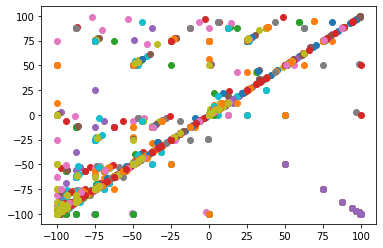

In [40]:
for i in range(0,len(iterator845)):
    x, y = iterator845[i].T 
    fig =plt.scatter(x, y) 

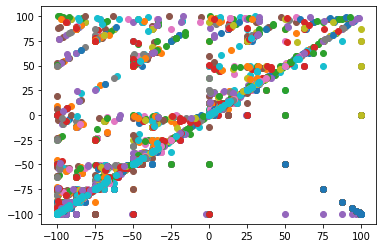

In [118]:
for i in range(0,len(iterator974)):
    x, y = iterator974[i].T 
    fig =plt.scatter(x, y) 

In [16]:
chaos_representation = {} #Empty dictionary to add values into
for values in filenames.values():
    chaos_representation[values[0]]=[]
    for z in range(len(values[1])):
        chaos_representation[values[0]].append(chaosmap(values[1][z])) 

In [17]:
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.popitem()
chaos_representation.keys()

dict_keys(['974_edited_cells.txt', '892_edited_cells.txt'])

In [133]:
mydataframe = pd.DataFrame()
for k,v in chaos_representation.items():
    for z in v:
        for x in z:
            lst1 = list(np.arange(1,len(z)))
        lst2 = list(np.repeat(k,len(z)))
    df = pd.DataFrame(list(zip(v, lst1, lst2)), columns =['Value','File', 'Name'])
    #df.insert(0, 'Sample', np.repeat(k, np.shape(df)[0]), True)
    mydataframe = mydataframe.append(df, ignore_index=True)

In [25]:
cols = ['X','Y', 'count','Sample']
dat = pd.DataFrame(columns = cols)
#dat = dat.append({'frame': str(i), 'count':i},ignore_index=True)
for k,v in chaos_representation.items():
    for y in v: #iterate through cell files for each sample
        x = 0   #create a counter to iterate trhough each cell in cell files  
        for z in range(x,len(y)):
            dat = dat.append({'X': y[z][0],'Y': y[z][1],'count':x, 'File': k}, ignore_index=True)
            x += 1

In [26]:
dat

X          Y count  Sample                  File
0      50.000000  50.000000     0     NaN  974_edited_cells.txt
1     -25.000000  75.000000     1     NaN  974_edited_cells.txt
2     -62.500000  87.500000     2     NaN  974_edited_cells.txt
3     -81.250000  93.750000     3     NaN  974_edited_cells.txt
4     -90.625000  96.875000     4     NaN  974_edited_cells.txt
...          ...        ...   ...     ...                   ...
38647 -73.333639 -73.333639    36     NaN  892_edited_cells.txt
38648 -86.666819 -86.666819    37     NaN  892_edited_cells.txt
38649   6.666590   6.666590    38     NaN  892_edited_cells.txt
38650  53.333295  53.333295    39     NaN  892_edited_cells.txt
38651  53.333295  53.333295    40     NaN  892_edited_cells.txt

[38652 rows x 5 columns]

In [148]:
cols = ['frame', 'count']
N = 4
dat = pd.DataFrame(columns = cols)
for i in range(N):
    dat = dat.append({'frame': str(i), 'count':i},ignore_index=True)
dat

frame count
0     0     0
1     1     1
2     2     2
3     3     3

In [134]:
mydataframe = pd.DataFrame()

Value  File  \
0    [[50.0, 50.0], [-25.0, 75.0], [-62.5, 87.5], [...     1   
1    [[50.0, -50.0], [75.0, -75.0], [87.5, -87.5], ...     2   
2    [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...     3   
3    [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...     4   
4    [[50.0, -50.0], [75.0, -75.0], [87.5, -87.5], ...     5   
..                                                 ...   ...   
486  [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...    21   
487  [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...    22   
488  [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...    23   
489  [[50.0, -50.0], [75.0, -75.0], [87.5, -87.5], ...    24   
490  [[-50.0, -50.0], [-75.0, -75.0], [-87.5, -87.5...    25   

                           Name  
0          974_edited_cells.txt  
1          974_edited_cells.txt  
2          974_edited_cells.txt  
3          974_edited_cells.txt  
4          974_edited_cells.txt  
..                          ...  
486  EPM6_S2-1_edited_cells.txt  
487  EPM6_S2-1_edited_cells.txt  
488  EPM6_S2-1_edited_cells.txt  
489  EPM6_S2-1_edited_cells.txt  
490  EPM6_S2-1_edited_cells.txt  

[491 rows x 3 columns]

In [125]:
chaos_representation
#mydataframe = pd.DataFrame()
#for k,v in chaos_representation.items():
 #   lst2 = list(np.repeat(k,len(v)))
  #  print(lst2)

{'974_edited_cells.txt': [array([[ 50.        ,  50.        ],
         [-25.        ,  75.        ],
         [-62.5       ,  87.5       ],
         [-81.25      ,  93.75      ],
         [-90.625     ,  96.875     ],
         [-95.3125    ,  98.4375    ],
         [-97.65625   ,  -0.78125   ],
         [-98.828125  , -50.390625  ],
         [-99.4140625 , -75.1953125 ],
         [  0.29296875,  12.40234375],
         [-49.85351562, -43.79882812],
         [-74.92675781, -71.89941406],
         [-87.46337891, -85.94970703],
         [-93.73168945, -92.97485352],
         [  3.13415527,   3.51257324],
         [-48.43292236,  51.75628662],
         [ 25.78353882,  75.87814331],
         [-37.10823059, -12.06092834],
         [-68.5541153 , -56.03046417],
         [-84.27705765, -78.01523209],
         [  7.86147118,  10.99238396],
         [-46.06926441, -44.50380802],
         [-73.03463221, -72.25190401],
         [-86.5173161 , -86.12595201],
         [-93.25865805, -93.062976  ],
 